#  DSC478 - Programming Machine Learning Applications
## Assignment 3 - Lavinia Wang

### Problem 1. Linear Regression

Experiment with linear regression models to make predictions with numerical data. Explore more systematic methods for feature selection and for optimizing model parameters (model selection).
The data set is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. The target attribute for regression purposes is
"ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.

Dataset: <a href='http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Data/communities.zip'>communities.csv</a> Dataset description <a href='http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Data/communities-descr.txt'>here</a>

In [32]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import math

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import feature_selection
from sklearn import cross_validation
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectPercentile, f_regression

In [2]:
# Change working directory
os.chdir('/resources/CSC478/Assignment3')

#### a. Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description). <br>Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [3]:
comm_df = pd.read_csv("communities.csv")
comm_df.head(5)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [4]:
comm_df.shape

(1994, 100)

In [5]:
# Compute and display basic statistics
comm_df.describe(include="all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jacksonvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [6]:
# Check if there are missing values in the dataset
value = '?' 
missing_check = any([value in row for row in comm_df.values])
missing_check

True

In [7]:
# Correct for the '?' in data
comm_df.OtherPerCap = pd.to_numeric(comm_df.OtherPerCap, errors = 'coerce') 
comm_df = comm_df.dropna(axis=0)

In [8]:
# Separate the target attribute for regression.
y = np.array(comm_df.ViolentCrimesPerPop)

# Remove categorical vars from x
x = np.array(comm_df.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis=1))

In [9]:
print(y.shape, x.shape)

(1993,) (1993, 97)


#### b. Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. <br>Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). <br>Finally, perform 10-fold crossvalidation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFoldmodule from sklearn.cross_validation).

In [10]:
# Function from Machine Learning in Action Book

def standRegres(xArr, yArr):
    xMat = np.matrix(xArr); yMat = np.matrix(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    else:
        ws = xTx.I * (xMat.T*yMat)
        return ws

In [11]:
# Prep the x_var set such that we can have a constant
x_var = np.array(x)
x_var = np.array([np.concatenate((v,[1])) for v in x_var])
x_var

array([[0.19, 0.33, 0.02, ..., 0.26, 0.2 , 1.  ],
       [0.  , 0.16, 0.12, ..., 0.12, 0.45, 1.  ],
       [0.  , 0.42, 0.49, ..., 0.21, 0.02, 1.  ],
       ...,
       [0.16, 0.37, 0.25, ..., 0.32, 0.18, 1.  ],
       [0.08, 0.51, 0.06, ..., 0.38, 0.33, 1.  ],
       [0.2 , 0.78, 0.14, ..., 0.3 , 0.05, 1.  ]])

In [12]:
# Perform the standard linear reg
std_reg = standRegres(x_var, y)
# Display the obtained regression coefficients (weights).
std_reg

matrix([[ 1.58394687e-01],
        [-3.02481869e-02],
        [ 2.12229063e-01],
        [-3.97237986e-02],
        [-1.27930326e-02],
        [ 6.36900639e-02],
        [ 1.22194419e-01],
        [-2.23124229e-01],
        [-1.42627637e-01],
        [ 5.64658800e-02],
        [-2.60230134e-01],
        [ 4.65037847e-02],
        [-2.00798143e-01],
        [-2.08126761e-01],
        [ 4.70792802e-02],
        [-1.73534979e-01],
        [ 5.82291674e-02],
        [ 1.05064444e-02],
        [-9.22106451e-02],
        [ 2.72565616e-01],
        [ 9.72713359e-02],
        [-3.26302914e-01],
        [-2.89431388e-02],
        [-3.59461641e-02],
        [ 2.28885702e-02],
        [ 4.31169895e-02],
        [ 3.76737976e-02],
        [ 1.19950473e-01],
        [-1.83693623e-01],
        [-9.47657739e-02],
        [ 5.55240764e-02],
        [ 1.07281673e-01],
        [ 3.24692051e-03],
        [ 2.34646790e-01],
        [-3.87649999e-02],
        [-1.03179240e-02],
        [ 4.87331629e-01],
 

In [13]:
# Compute the RMSE value on the full training data
yHat = x_var * std_reg
yHatT = yHat.T
err = abs(yHatT - y)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err, err.T)

rmse = np.sqrt(total_error/len(yHat))
print(rmse) 
#print(yHatT,y)

[[0.12869119]]


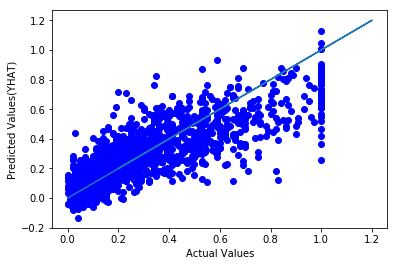

In [14]:
# Plot the correlation between the predicted and actual values of the target attribute.

plt.plot(y, yHat, 'bo')
plt.plot([0,1.2,0.2],[0,1.2,0.2])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values(YHAT)')
plt.show()

In [15]:
#Calculate the correlation coefficient
np.corrcoef(yHatT, y)

array([[1.        , 0.83360656],
       [0.83360656, 1.        ]])

We can see from the graph and table that predicted and actual values are highly correlated (Correlation Coefficient = 0.0.83360656)

In [18]:
## 10 fold cross vaidation
lin_reg = LinearRegression()
# Train the model using the training sets
fit_linreg = lin_reg.fit(x_var, y)

# Create the prediction
linreg_p = lin_reg.predict(x_var)
error = abs(linreg_p - y)
totalErr = np.dot(error, error)
rmse_train = np.sqrt(totalErr/len(linreg_p))


# Divide data into folds
kf = KFold(len(x_var), n_folds=10)
xval_err = 0

# Calculate the rmse for the 10 folds
for train,test in kf:
    lin_reg.fit(x_var[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = lin_reg.predict(x_var[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x_var))

print("Original rmse: {:.8f}".format(rmse_train) , "     10 fold rmse: {:.8f}".format(rmse_10cv))

Original rmse: 0.12869119      10 fold rmse: 0.13629806


So we can see that the RMSE over training data was 0.12869119 and for 10-fold cross validation it is 0.13629806. So we can see that the RMSE increased after 10-fold cross validation.

#### c. Feature Selection: use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. <br>For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold crossvalidation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. <br>Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). <br>Next, plot the model's mean absolute error values on cross-validation relative to the percentage of selected features (See scikitlearn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. Review scikitlearn documentation for feature selection.

In [19]:
# Create a train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)

In [20]:
y_train.shape

(1594,)

1 0.1131168742327064
6 0.10161771123123191
11 0.10143611386778437
16 0.10151188293290567
21 0.09947901014349207
26 0.09866057027037717
31 0.09778947530573437
36 0.09726265948360678
41 0.09694532318179702
46 0.09768092373591211
51 0.09755830708127299
56 0.09809115180001224
61 0.0986525257904036
66 0.0988393149427907
71 0.09902672428247225
76 0.09891114498141643
81 0.09863681767006666
86 0.09811756164340192
91 0.09830813736813943
96 0.09739148948426006
Optimal percentile of features:41 

Optimal number of features:39 



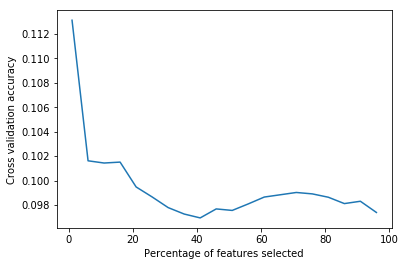

In [21]:
linreg = LinearRegression()

percentiles = range(1, 100, 5)
results = []

for i in range(1, 100, 5):
    fs = SelectPercentile(feature_selection.f_regression, percentile=i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    """ DeprecationWarning: Scoring method 'mean_absolute_error' was renamed to 'neg_mean_absolute_error' in version 0.18 and will be removed in 0.20  """
    scores = abs(cross_validation.cross_val_score(linreg, x_train_fs, y_train, cv=5, scoring='neg_mean_absolute_error'))
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.min())[0]
print ("Optimal percentile of features:{0}".format(percentiles[int(optimal_percentile)]), "\n")
optimal_num_features = int(math.floor(percentiles[int(optimal_percentile)]*x.shape[1]/100))
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results,label=' Best Percentile Graph')

In [22]:
# Using optimal percentile

fs = SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(x_train, y_train)

In [23]:
df_comm_x = comm_df.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis=1, inplace = False)

In [24]:
for i in range(len(df_comm_x.columns.values)):
    if fs.get_support()[i]:
        print (df_comm_x.columns.values[i],'\t\t', fs.scores_[i])

population 		 229.5994387214822
racepctblack 		 992.164385084778
racePctWhite 		 1304.8806138268262
numbUrban 		 223.61673819229662
medIncome 		 341.3095735160522
pctWWage 		 170.55412925955056
pctWInvInc 		 761.0568397801964
pctWPubAsst 		 783.2243592146174
medFamInc 		 374.43469571111996
perCapInc 		 214.96942659482838
NumUnderPov 		 361.9594023390105
PctPopUnderPov 		 569.4858535418567
PctLess9thGrade 		 296.03204170554983
PctNotHSGrad 		 461.05779209245355
PctBSorMore 		 169.04178961921966
PctUnemployed 		 532.3616336751957
PctEmploy 		 196.38435597335126
MalePctDivorce 		 580.3420144382108
FemalePctDiv 		 693.8626992089225
TotalPctDiv 		 677.2286585312002
PctFam2Par 		 1596.8391699130038
PctKids2Par 		 1901.3001500116889
PctYoungKids2Par 		 1269.9824661860744
PctTeen2Par 		 1231.3207931534723
NumIlleg 		 399.8278427791814
PctIlleg 		 1856.8497011201168
PctLargHouseFam 		 240.0086164711013
PctPersOwnOccup 		 600.0985735147077
PctPersDenseHous 		 348.80809055762506
PctHousLess3BR 		

In [25]:
# Calculating Mean absolute Error on the testing using 39 informatic features
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(x_train, y_train)
linreg = LinearRegression()
linreg.fit(x_train_fs, y_train)
x_test_fs = fs.transform(x_test)
lr_pred = linreg.predict(x_test_fs)
lr_mae = mean_squared_error(y_test, lr_pred)

print ('Mean absolute Error (MAE) of the testing data is %0.8f' % lr_mae)

Mean absolute Error (MAE) of the testing data is 0.01944931


So using the best set of features and running the model with that feature subset on the set-aside test data we get MAE of 0.01944931.

#### d. Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. <br>First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. <br>You should create a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. <br>The model selection process should perform k-fold cross validation (k should be a parameter,  but you can select k=5 for this problem). <br>You should also plot the error values on the training and crossvalidation splits across the specified values of the alphaparameter. <br>Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_var, y, test_size=0.2, random_state=33)

In [28]:
def calc_params(x, y, param_name, param_values, K, model, model_name):
    
    # Convert input to Numpy arrays
    x = np.array(x)
    y = np.array(y)

    # Initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # Iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # Set classifier parameters
        model.set_params(**{param_name:param_value})
        
        # Initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # Create KFold cross validation
        cv = KFold(len(x), K, shuffle=True, random_state=0)
        
        # Iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # Fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            model.fit([x[k] for k in train], y[train])
            train_predict = model.predict(x[train])
            test_predict = model.predict(x[test])
            
            k_train_scores = mean_absolute_error(y[train], train_predict)
            k_test_scores = mean_absolute_error(y[test], test_predict)
            
        # Store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        
        #print ("Alpha:",param_value)
        #print ("MAE Cross Validation Train:", train_scores[i])
        #print ("MAE Cross Validation Test:", test_scores[i])
        #print ('\n')
       
    # Plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Cross Validation Error")
    plt.title(model_name)
    
    min_err_idx = np.where(test_scores == test_scores.min())
    min_err_alpha = param_values[min_err_idx]
    print ('The minimum MAE using cross validation is:', test_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0])

In [54]:
# Alpha values
alpha = np.linspace(0.001, 20, 100)
alpha = np.array([float(e) for e in alpha])

In [55]:
# Ridge and Lasso from sklean
ridge = Ridge()
lasso = Lasso()

The minimum MAE using cross validation is: 0.09946437220523124 with alpha : 0.809040404040404


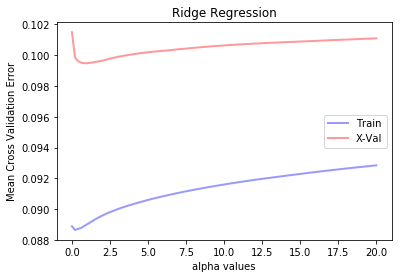

In [56]:
# Ridge Regression
calc_params(x_train, y_train, "alpha", alpha, 5, ridge, "Ridge Regression")

In [59]:
ridge = Ridge(fit_intercept=True, alpha=0.809040404040404)
ridge.fit(x_train, y_train)    
pred = ridge.predict(x_test)
MAE = mean_absolute_error(y_test, pred)
print('Mean absolute error on test data: %0.8f' % MAE, 'using alpha = 0.809040404040404')

Mean absolute error on test data: 0.09324513 using alpha = 0.809040404040404


The minimum MAE using cross validation is: 0.10111319286028637 with alpha : 0.001


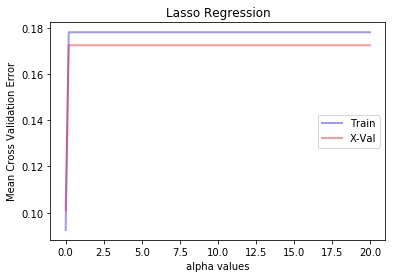

In [47]:
# Lasso Regression
calc_params(x_train, y_train, "alpha", alpha, 5, lasso, "Lasso Regression")

So we can see that the alpha value of 0.001 gives the lowest MAE on training data and we can use that to run the model on set aside test data.

In [80]:
lasso = Lasso(fit_intercept=True, alpha=0.001)
lasso.fit(x_train, y_train)    
pred = lasso.predict(x_test)
MAE = mean_absolute_error(y_test, pred)
print('Mean absolute error on test data: %0.8f' % MAE,'using alpha = 0.001')

Mean absolute error on test data: 0.09276014 using alpha = 0.001


* <b>Ridge Regression

<b>For ridge regression we can see that the lowest MAE we get on cross validation is when alpha is 0.809040404040404, MAE starts to decrease for alpha values from 0.001 to 0.809040404040404 but after that it starts to increase. For alpha = 0.001 we are overfitting the model for Ridge Regression and then if we still increase the alpha after 0.809040404040404 we see that both training and X-val MAE increases which shows that we might underfit the model if we take higher values of alpha, so alpha = 0.809040404040404 is where we get the best fit model. Using that value of alpha the MAE we get on set aside test data set is 0.09324513.

* <b>Lasso Regression

<b>For lasso regression we can see that the lowest MAE we get on cross validation is for alpha = 0.01. MAE increases as we increase the value of alpha and reaches a point where it remains the same for alpha value greater than 0.001, so alpha = 0.001 is where we get the best fit model. Using that value of alpha the MAE we get on set aside test data set is 0.09276014.

#### e. Next, perform regression using Stochastic Gradient Descent for regression. <br>For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start by a creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). <br>Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. <br>For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, apply the model to the set-aside test data. <br>Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1; l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [62]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(x_var)
x_std = scaler.transform(x_var)
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=33)

In [73]:
# Stochastic Gradient Descent
sgd = SGDRegressor()

parameters = {'penalty': ['l2','l1'],  'alpha': [0.0001, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20]}

gs = GridSearchCV(sgd, parameters, verbose=1, cv=5)

In [74]:
# Run the grid search
%time _ = gs.fit(x_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/anaconda3/lib/python3.6/site-

CPU times: user 1.37 s, sys: 4 ms, total: 1.37 s
Wall time: 1.41 s


/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/anaconda3/lib/python3.6/site-

({'alpha': 0.001, 'penalty': 'l1'}, 0.6393660606622487)

```
({'alpha': 0.001, 'penalty': 'l1'}, 0.6393660606622487)
```

In [75]:
for (i, j) in gs.best_params_.items():
    sgd.set_params(**{i:j})
    print ("The optimum value of", i, "is estimated as", j)
    print("\n")

The optimum value of alpha is estimated as 0.001


The optimum value of penalty is estimated as l1




In [79]:
# Using the best parameters, apply the model to the set-aside test data
sgd = SGDRegressor(penalty = 'l1', alpha = 0.001)
sgd.fit(x_train, y_train)
pred = sgd.predict(x_test)
MAE = mean_absolute_error(y_test, pred)

print ('MAE on set-aside test data set: %0.8f' % MAE, "with penalty equals to 'l1' and alpha equals to 0.001")

MAE on set-aside test data set: 0.09319853 with penalty equals to 'l1' and alpha equals to 0.001


/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Model selection (similar to question d, above) to find the best "l1_ratio" parameter using SGDRegressor with the "elasticnet" penalty parameter. The calc_params function can take any models and any paramters so use the same function to do the model selection to find the best value for "l1_ratio" when penalty="elasticnet".

/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/anaconda3/lib/python3.6/site-

The minimum MAE using cross validation is: 0.0997056965531981 with l1_ratio : 0.37376262626262624


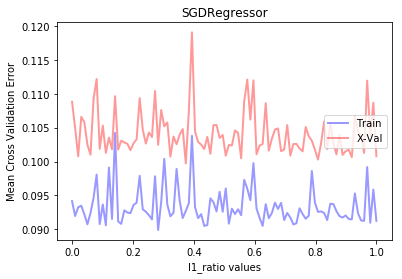

In [77]:
l1_ratio_range = np.linspace(0.0001,0.9999, 100)

sgd = SGDRegressor(penalty='elasticnet')
calc_params(x_train, y_train, "l1_ratio", l1_ratio_range, 5, sgd, "SGDRegressor")

```
The minimum MAE using cross validation is: 0.0997056965531981 with l1_ratio : 0.37376262626262624
```

So we can see that the l1_ratio value of 0.37376262626262624 gives the lowest MAE on training data and we can use that to run the model on set aside test data with "elasticnet" as the penalty parameter.

In [78]:
# Using the best parameters, apply the model to the set-aside test data
sgd = SGDRegressor(penalty='elasticnet', l1_ratio=0.37376262626262624)
sgd.fit(x_train, y_train)
pred = sgd.predict(x_test)
MAE = mean_absolute_error(y_test, pred)

print ('MAE on set-aside test data set: %0.8f' % MAE, "with penalty equals to 'elasticnet' and l1_ratio = 0.37376262626262624")

MAE on set-aside test data set: 0.09373206 with penalty equals to 'elasticnet' and l1_ratio = 0.37376262626262624


/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


<b>For SGDregression we can see that the lowest MAE we get on cross validation is for l1_ratio = 0.37376262626262624. Using that value of l1_ratio the MAE we get on set-aside test data set is 0.09373206.

<b>MAE values we get on cross validation using the best parameters for Ridge, Lasso and SGD Regression are:

* Ridge: 0.09946437220523124

* Lasso: 0.10111319286028637

* SGD: 0.0997056965531981

<b>MAE values we get on set-aside test data set using the best parameters for Ridge, Lasso and SGD Regression are:

* Ridge: 0.09324513

* Lasso: 0.09276014

* SGD: 0.09373206

<b>MAE values on the test data set using Ridge, Lasso and SGD regression is almost same but the MAE for Ridge Regression is lowest followed by MAE of SGD and Lasso and so Ridge Regression is better choice for this dataset.</b>